# Bot nor notbot twitter accounts Classification

In this project, we would like to detect the twitter bots using machine learning algorithms, such as Naive Bayes, Random Forest, Logistic Regression. 

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
from pandas import Series
%matplotlib inline
path_to_insults = 'data/'
bots_data = pd.read_csv(path_to_insults + 'bots_data.csv')
nonbots_data = pd.read_csv(path_to_insults + 'nonbots_data.csv')
bots_data.head(2)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1


In [9]:
print(bots_data.shape)
print(nonbots_data.shape)

(1056, 20)
(1176, 20)


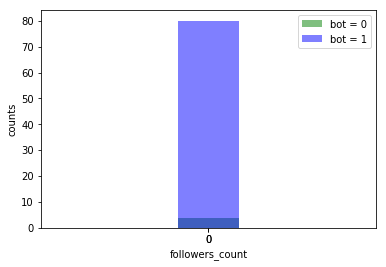

In [10]:
# bot has 80 counts of zero followers_count, nonbot has only 4 count of zero followers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = np.linspace(-0.5,0.5,6)
plt.hist(x, bins,alpha=0.5,color='g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('followers_count')
#plt.axis([0,5,0,100])
plt.xticks([0,0])
plt.legend(loc='upper right')
plt.show()

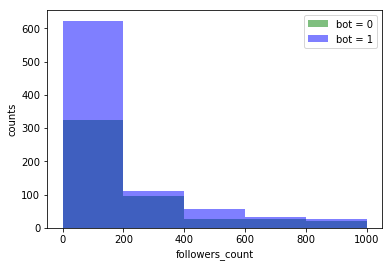

In [11]:
# in this range, bot has 188 counts of followers_count, nonbot has only 48 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = np.linspace(0,1000,6)
plt.hist(x, bins,alpha=0.5,facecolor='g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('followers_count')
#plt.axis([0,1000,0,100])
plt.legend(loc='upper right')
plt.show()

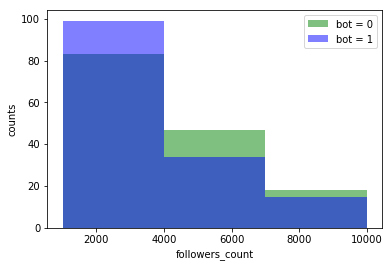

In [12]:
# in this range, bot has 275 counts of followers_count, nonbot has only 205 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = np.linspace(1000,10000,4)
plt.hist(x, bins,alpha=0.5,facecolor='g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('followers_count')
#plt.axis([10,100,0,130])
plt.legend(loc='upper right')
plt.show()

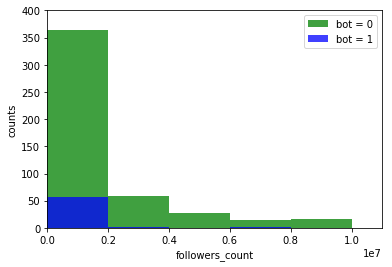

In [13]:
# in this range, bot has 50 counts of followers_count, nonbot has only 140 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = np.linspace(10000,10000000,6)
plt.hist(x, bins,alpha=0.75,facecolor='g',label='bot = 0')
plt.hist(y, bins,alpha=0.75,facecolor ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('followers_count')
plt.axis([10000,11000000,0,400])
plt.legend(loc='upper right')
plt.show()

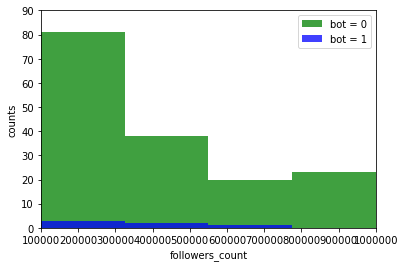

In [14]:
# in this range, bot has 6 counts of followers_count, nonbot has only 160 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = np.linspace(100000,1000000,5)
plt.hist(x, bins,alpha=0.75,facecolor='g',label='bot = 0')
plt.hist(y, bins,alpha=0.75,facecolor ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('followers_count')
plt.axis([100000,1000000,0,90])
plt.legend(loc='upper right')
plt.show()

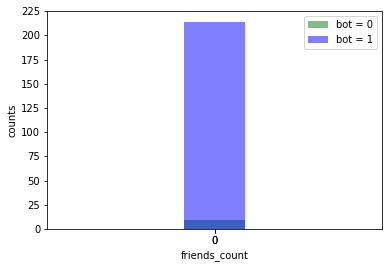

In [15]:
# bot has 215 counts of zero friends_count, nonbot has only 9 count of zero friends_count
x = nonbots_data['friends_count']
y = bots_data['friends_count']
bins = np.linspace(-0.5,0.5,6)
plt.hist(x, bins,alpha=0.5,facecolor = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('friends_count')
#plt.axis([0,5,0,250])
plt.xticks([0,0])
plt.legend(loc='upper right')
plt.show()

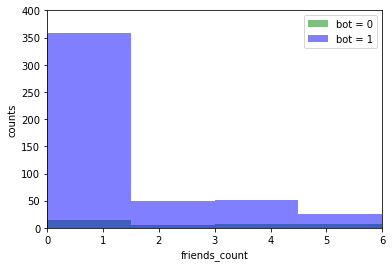

In [16]:
# in this range, bot has 275 counts of friends_count, nonbot has only 25 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = np.linspace(0,6,5)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('friends_count')
plt.axis([0,6,0,400])
plt.legend(loc='upper right')
plt.show()

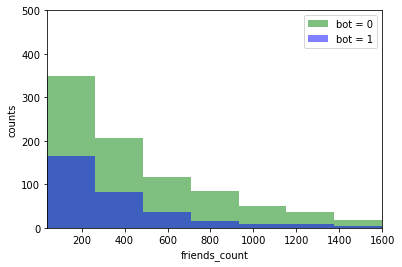

In [17]:
# in this range, bot has 325 counts offriends_count, nonbot has 875 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = np.linspace(40,1600,8)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('friends_count')
plt.axis([40,1600,0,500])
plt.legend(loc='upper right')
plt.show()

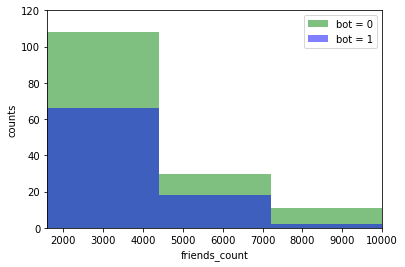

In [18]:
# in this range, bot has 85 counts offriends_count, nonbot has 150 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = np.linspace(1600,10000,4)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('friends_count')
plt.axis([1600,10000,0,120])
plt.legend(loc='upper right')
plt.show()

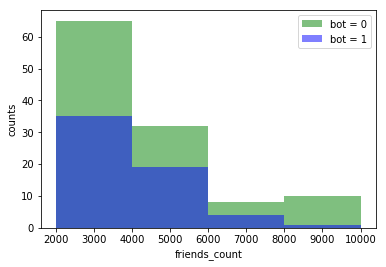

In [19]:
# in this range, bot has 85 counts offriends_count, nonbot has 150 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = np.linspace(2000,10000, 5)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('friends_count')
#plt.axis([1600,10000,0,120])
plt.legend(loc='upper right')
plt.show()

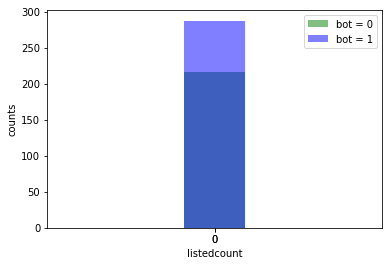

In [20]:
# bot has 285 counts of zero listed_count, nonbot has 220 count of zero listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = np.linspace(-0.5,0.5,6)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('listedcount')
plt.xticks([0,0])
plt.legend(loc='upper right')
plt.show()

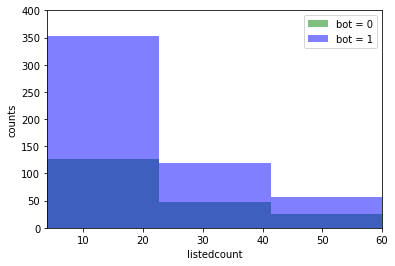

In [21]:
# in this range, bot has 525 counts of listed_count, nonbot has 200 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = np.linspace(4,60,4)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('listedcount')
plt.axis([4,60,0,400])
plt.legend(loc='upper right')
plt.show()

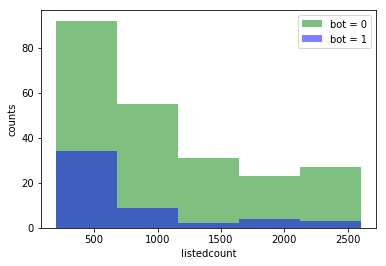

In [22]:
# in this range, bot has 50 counts of listed_count, nonbot has 240 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = np.linspace(200,2600,6)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('listedcount')
#plt.axis([200,2600,0,250])
plt.legend(loc='upper right')
plt.show()

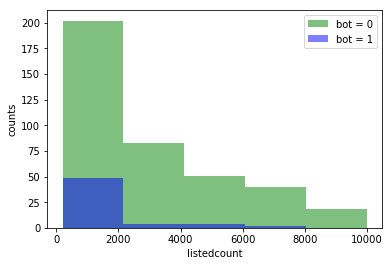

In [23]:
# in this range, bot has 50 counts of listed_count, nonbot has 240 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = np.linspace(200,10000,6)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('listedcount')
#plt.axis([200,2600,0,250])
plt.legend(loc='upper right')
plt.show()

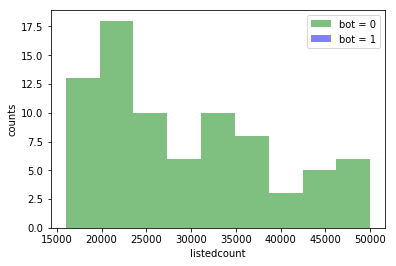

In [24]:
# in this range, bot has 0 counts of listed_count, nonbot has 92 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = np.linspace(16000,50000,10)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('listedcount')
#plt.axis([20000,300000,0,90])
plt.legend(loc='upper right')
plt.show()

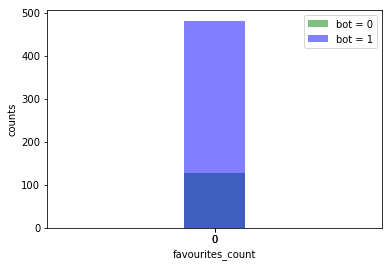

In [25]:
# bot has 480 counts of zero listed_count, nonbot has  120 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins =np.linspace(-0.5,0.5, 6)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('favourites_count')
plt.xticks([0,0])
plt.legend(loc='upper right')
plt.show()

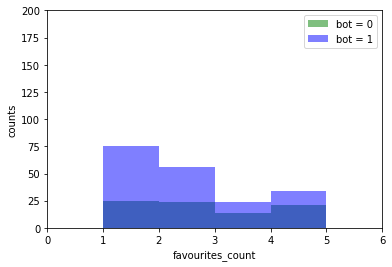

In [26]:
# bot has 188 counts of zero listed_count, nonbot has  85 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = np.linspace(1,5,5)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('favourites_count')
plt.axis([0,6,0,200])
plt.legend(loc='upper right')
plt.show()

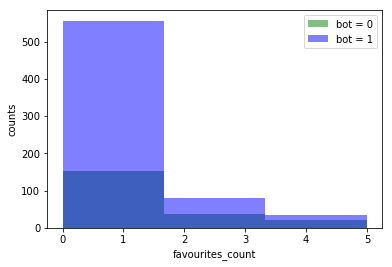

In [27]:
# bot has 188 counts of zero listed_count, nonbot has  85 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = np.linspace(0,5,4)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('favourites_count')
#plt.axis([0,5,0,140])
plt.legend(loc='upper right')
plt.show()

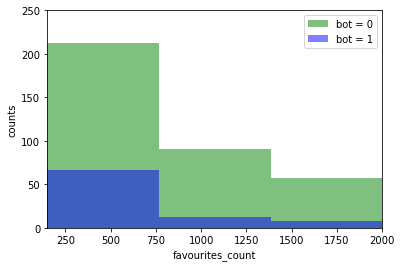

In [28]:
# bot has 85 counts of zero listed_count, nonbot has 360 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = np.linspace(150,2000,4)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('favourites_count')
plt.axis([150,2000,0,250])
plt.legend(loc='upper right')
plt.show()

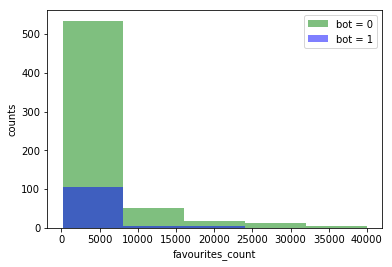

In [29]:
# bot has 85 counts of zero listed_count, nonbot has 360 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = np.linspace(150,40000,6)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('favourites_count')
#plt.axis([150,2000,0,250])
plt.legend(loc='upper right')
plt.show()

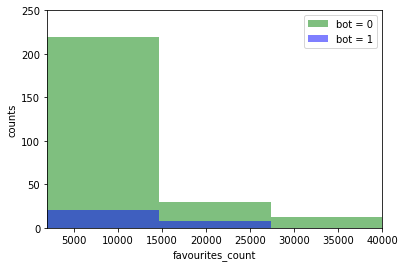

In [30]:
# bot has 25 counts of zero listed_count, nonbot has  265 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = np.linspace(2000,40000,4)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('favourites_count')
plt.axis([2000,40000,0,250])
plt.legend(loc='upper right')
plt.show()

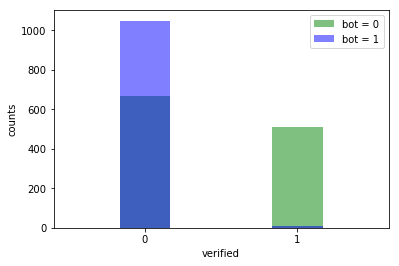

In [31]:
#verified or not
x = nonbots_data['verified']*1
y = bots_data['verified']*1
bins = np.linspace(-0.5,1.5,7)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('verified')
plt.xticks([0,1])
plt.axis(align = "center", width = 0.25)
#plt.axis([0,2,0,1200])
plt.xticks([0,1])
plt.legend(loc='upper right')
plt.show()

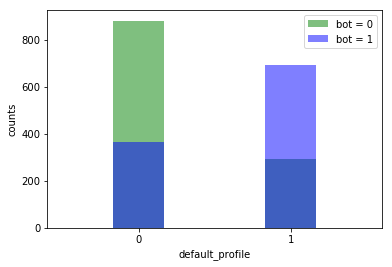

In [32]:
#verified or not
x = nonbots_data['default_profile']*1
y = bots_data['default_profile']*1
bins = np.linspace(-0.5,1.5,7)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('default_profile')
#plt.axis([0,2,0,250])
plt.xticks([0,1])
plt.legend(loc='upper right')
plt.show()

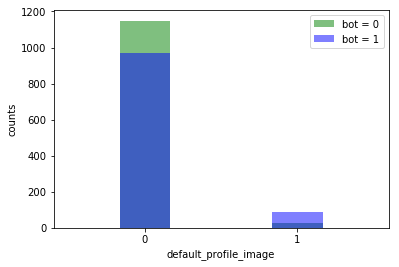

In [33]:
#have default_profile_image or not
x = nonbots_data['default_profile_image']*1
y = bots_data['default_profile_image']*1
bins = np.linspace(-0.5,1.5,7)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('default_profile_image')
#plt.axis([0,2,0,250])
plt.xticks([0,1])
plt.legend(loc='upper right')
plt.show()

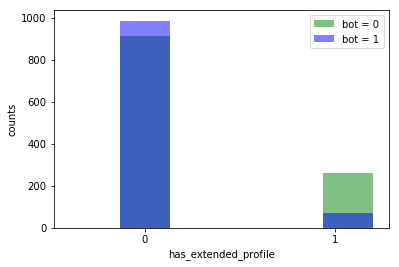

In [34]:
#have default_profile_image or not
x = nonbots_data['has_extended_profile']*1
y = bots_data['has_extended_profile']*1
bins = np.linspace(-0.4,1.2,7)
plt.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
plt.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
plt.ylabel('counts')
plt.xlabel('has_extended_profile')
#plt.axis([0,2,0,250])
plt.xticks([0,1])
plt.legend(loc='upper right')
plt.show()

In [35]:
#join two dataframe
frame = [bots_data, nonbots_data]
all_data = pd.concat(frame)
all_data.shape

(2232, 20)

# description as feature

In [36]:
#description as feature
#fill NaN with 'missing'
all_data_nafill = all_data.fillna('missing')

#encode string with utf-8
all_data_nafill['description'] = all_data_nafill['description'].str.decode('iso-8859-1').str.encode('utf-8')

# Train CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_comment_counts = count_vect.fit_transform(all_data_nafill.description)

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 75.044803%
Precision: 82.872200%
Recall: 59.564394%
F1: 69.311295%
AUC: 74.254986%


In [37]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 74.193548%
Precision: 75.917927%
Recall: 66.571970%
F1: 70.938446%
AUC: 73.804692%


In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_comment_counts,all_data.bot)
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 68.637993%
Precision: 67.281553%
Recall: 65.625000%
F1: 66.442953%
AUC: 68.484269%


In [39]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_comment_counts,all_data.bot)
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 74.148746%
Precision: 82.853224%
Recall: 57.196970%
F1: 67.675070%
AUC: 73.283859%


# screen_name as feature

In [40]:
#screen_name as feature
#Accuracy: 52.508961%
#Precision: 49.367089%
#Recall: 90.347490%
#F1: 63.847203%
#AUC: 55.039966%

#encode string with utf-8
all_data_nafill['screen_name'] = all_data_nafill['screen_name'].str.decode('iso-8859-1').str.encode('utf-8')

from sklearn.cross_validation import cross_val_score,train_test_split
X_screen_name = all_data_nafill.screen_name
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_screen_name, y_bot,random_state = 1)

#BernoulliNB
# Train CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_sname_counts = count_vect.fit_transform(all_data_nafill.screen_name)

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_sname_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_sname_counts, all_data.bot)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 52.508961%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 49.829932%


C:\Users\jiaow\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# status as feature

In [41]:
#status as feature
#encode string with utf-8
all_data_nafill['status'] = all_data_nafill['status'].str.decode('iso-8859-1').str.encode('utf-8')

from sklearn.cross_validation import cross_val_score,train_test_split
status = all_data_nafill.status
bot =all_data.bot
status_train, status_test, y_train, y_test = train_test_split(status, bot, random_state = 1)

In [42]:
#Train CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

#Train TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')

#Train HashingVectorizer
#from sklearn.feature_extraction.text import HashingVectorizer
#vectorizer = HashingVectorizer(stop_words='english', non_negative=True)

X_status = vectorizer.fit_transform(status)
X_train = vectorizer.fit_transform(status_train)
X_test = vectorizer.transform(status_test)
    
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, predicted)) + '%')

Accuracy: 71.326165%
Precision: 70.040486%
Recall: 66.795367%
F1: 68.379447%
AUC: 71.023101%


In [43]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, predicted)) + '%')



Accuracy: 73.118280%
Precision: 76.328502%
Recall: 61.003861%
F1: 67.811159%
AUC: 72.307951%


In [44]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, predicted)) + '%')

Accuracy: 73.835125%
Precision: 73.443983%
Recall: 68.339768%
F1: 70.800000%
AUC: 73.467543%


In [45]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, predicted)) + '%')

Accuracy: 78.494624%
Precision: 74.910394%
Recall: 80.694981%
F1: 77.695167%
AUC: 78.641805%


In [46]:
#SVM
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_status, all_data.bot)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 77.777778%
Precision: 74.221453%
Recall: 81.250000%
F1: 77.576854%
AUC: 77.954932%


# verified as feature

In [47]:
#verified as feature
#split data to train dataset and test dataset
from sklearn.cross_validation import cross_val_score,train_test_split
X_verified =all_data.verified
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_verified, y_bot,random_state = 1)

In [48]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


In [50]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


# number of  followers as feature:

In [51]:
all_data_edited = all_data[(all_data['followers_count'] >= 1)& (all_data['followers_count'] <= 10)]

In [52]:
all_data_edited = all_data[(all_data['followers_count'] >= 0)& (all_data['followers_count'] <= 10)]


In [53]:
all_data_edited = all_data[(all_data['followers_count'] == 0)]

In [54]:

all_data_edited = all_data[(all_data['followers_count'] >= 100000)]

In [55]:
from sklearn.cross_validation import cross_val_score,train_test_split
X =all_data_edited.followers_count
y_bot =all_data_edited.bot
X_train, X_test, y_train, y_test = train_test_split(X, y_bot,random_state = 1)

In [56]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 97.029703%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


C:\Users\jiaow\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jiaow\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 97.029703%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [58]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 96.039604%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 49.489796%


In [59]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 97.029703%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


# number of friends as feature

In [60]:
all_data_edited = all_data[(all_data['friends_count'] == 0)]

In [61]:
all_data_edited = all_data[(all_data['friends_count'] >= 400)&(all_data['friends_count'] <= 1600)]

In [62]:
all_data_edited = all_data[(all_data['friends_count'] >= 10000)]

In [63]:
all_data_edited = all_data[(all_data['friends_count'] >= 0)&(all_data['friends_count'] <= 6)]

In [64]:
from sklearn.cross_validation import cross_val_score,train_test_split
X =all_data_edited.friends_count
y_bot =all_data_edited.bot
X_train, X_test, y_train, y_test = train_test_split(X, y_bot,random_state = 1)

In [65]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 94.656489%
Precision: 94.656489%
Recall: 100.000000%
F1: 97.254902%
AUC: 50.000000%


In [66]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 94.656489%
Precision: 94.656489%
Recall: 100.000000%
F1: 97.254902%
AUC: 50.000000%


In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 94.656489%
Precision: 94.656489%
Recall: 100.000000%
F1: 97.254902%
AUC: 50.000000%


In [68]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 94.656489%
Precision: 94.656489%
Recall: 100.000000%
F1: 97.254902%
AUC: 50.000000%


# number of listed count

In [69]:
all_data_edited = all_data[(all_data['listedcount'] == 0)]
#not good, Accuracy: 48.412698%
#Precision: 48.412698%
#Recall: 100.000000%
#F1: 65.240642%
#AUC: 50.000000%

In [70]:
all_data_edited = all_data[(all_data['listedcount'] >= 200)& (all_data['listedcount'] <= 5000)]
#Accuracy: 88.043478%
#Precision: 0.000000%
#Recall: 0.000000%
#F1: 0.000000%
#AUC: 50.000000%

In [71]:
all_data_edited = all_data[(all_data['listedcount'] >= 200)&(all_data['listedcount'] <= 2600)]
#Accuracy: 80.000000%
#Precision: 0.000000%
#Recall: 0.000000%
#F1: 0.000000%
#AUC: 50.000000%

In [72]:
all_data_edited = all_data[(all_data['listedcount'] >= 4)&(all_data['listedcount'] <= 60)]
#Accuracy: 72.677596%
#Precision: 72.677596%
#Recall: 100.000000%
#F1: 84.177215%
#AUC: 50.000000%

In [73]:
all_data_edited = all_data[(all_data['listedcount'] >= 3000)]
#Accuracy: 97.468354%
#Precision: 0.000000%
#Recall: 0.000000%
#F1: 0.000000%
#AUC: 50.000000%

In [74]:
from sklearn.cross_validation import cross_val_score,train_test_split
X =all_data_edited.listedcount
y_bot =all_data_edited.bot
X_train, X_test, y_train, y_test = train_test_split(X, y_bot,random_state = 1)

In [75]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 97.468354%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [76]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 97.468354%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [77]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 97.468354%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [78]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 96.202532%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 49.350649%


In [79]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 97.468354%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


# Number of favourites count

In [80]:
all_data_edited = all_data[(all_data['favourites_count'] >= 0)& (all_data['favourites_count'] <= 1)]
#Accuracy: 76.836158%
#Precision: 76.836158%
#Recall: 100.000000%
#F1: 86.900958%
#AUC: 50.000000%

In [81]:
all_data_edited = all_data[(all_data['favourites_count'] >= 2000)& (all_data['favourites_count'] <= 40000)]
#Accuracy: 90.410959%
#Precision: 0.000000%
#Recall: 0.000000%
#F1: 0.000000%
#AUC: 50.000000%

In [82]:
all_data_edited = all_data[(all_data['favourites_count'] == 0)]
#Accuracy: 78.289474%
#Precision: 78.289474%
#Recall: 100.000000%
#F1: 87.822878
#AUC: 50.000000%

In [83]:
all_data_edited = all_data[(all_data['favourites_count'] >= 10000)]
#Accuracy: 91.666667%
#Precision: 0.000000%
#Recall: 0.000000%
#F1: 0.000000%
#AUC: 50.000000%

In [84]:
from sklearn.cross_validation import cross_val_score,train_test_split
X =all_data_edited.favourites_count
y_bot =all_data_edited.bot
X_train, X_test, y_train, y_test = train_test_split(X, y_bot,random_state = 1)

In [85]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 91.666667%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [86]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 91.666667%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [87]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 75.000000%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 40.909091%


In [88]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 79.166667%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 43.181818%


# Default profile image as feature

In [89]:
#dafault_profile_image as feature
#split data to train dataset and test dataset
#Accuracy: 56.272401%
#Precision: 82.608696%
#Recall: 7.335907%
#F1: 13.475177%
#AUC: 52.999057%
from sklearn.cross_validation import cross_val_score,train_test_split
X_default_profile_image =all_data.default_profile_image
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_default_profile_image, y_bot,random_state = 1)

In [90]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


In [91]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


In [92]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


In [93]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


# status count as feature

In [94]:
all_data_edited = all_data[(all_data['statuses_count'] >=100000)]

In [95]:
from sklearn.cross_validation import cross_val_score,train_test_split
X =all_data_edited.statuses_count
y_bot =all_data_edited.bot
X_train, X_test, y_train, y_test = train_test_split(X, y_bot,random_state = 1)

In [96]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 73.333333%
Precision: 73.333333%
Recall: 100.000000%
F1: 84.615385%
AUC: 50.000000%


In [97]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 60.000000%
Precision: 72.727273%
Recall: 72.727273%
F1: 72.727273%
AUC: 48.863636%


In [98]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 73.333333%
Precision: 73.333333%
Recall: 100.000000%
F1: 84.615385%
AUC: 50.000000%


# default profile as feature

In [99]:
#default_profile as feature
#Accuracy: 70.609319%
#Precision: 69.076305%
#Recall: 66.409266%
#F1: 67.716535%
#AUC: 70.328379%
#split data to train dataset and test dataset
from sklearn.cross_validation import cross_val_score,train_test_split
X_default_profile =all_data.default_profile
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_default_profile, y_bot,random_state = 1)

In [100]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 70.609319%
Precision: 69.076305%
Recall: 66.409266%
F1: 67.716535%
AUC: 70.328379%


In [101]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 70.609319%
Precision: 69.076305%
Recall: 66.409266%
F1: 67.716535%
AUC: 70.328379%


In [102]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 70.609319%
Precision: 69.076305%
Recall: 66.409266%
F1: 67.716535%
AUC: 70.328379%


# whether they have extended profile as feature

In [103]:
all_data['has_extended_profile'].isnull().any()
all_data_edited = all_data['has_extended_profile'].fillna(method = 'ffill')

In [104]:
#has_extended_profile as feature
#Accuracy: 52.508961%
#Precision: 49.367089%
#Recall: 90.347490%
#F1: 63.847203%
#AUC: 55.039966%
from sklearn.cross_validation import cross_val_score,train_test_split
X_has_extended_profile = all_data_edited
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_has_extended_profile, y_bot,random_state = 1)

In [105]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 52.508961%
Precision: 49.367089%
Recall: 90.347490%
F1: 63.847203%
AUC: 55.039966%


In [106]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 52.508961%
Precision: 49.367089%
Recall: 90.347490%
F1: 63.847203%
AUC: 55.039966%


In [107]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 52.508961%
Precision: 49.367089%
Recall: 90.347490%
F1: 63.847203%
AUC: 55.039966%


# Obsoleted Code

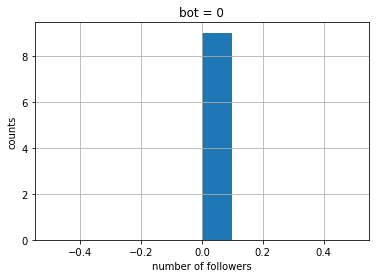

In [108]:
followers_pattern_nonbot = nonbots_data[['friends_count']]
followers_plot = followers_pattern_nonbot['friends_count'].hist(bins=10, range =(0, 0))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

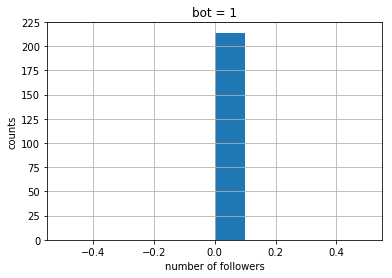

In [109]:
followers_pattern = bots_data[['friends_count']]
followers_plot = followers_pattern['friends_count'].hist(bins=10,range = (0,0))
followers_plot.set_title('bot = 1')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')

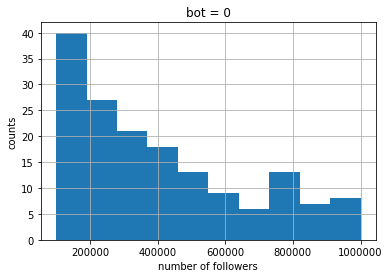

In [110]:
followers_pattern_nonbot = nonbots_data[['followers_count']]
followers_plot = followers_pattern_nonbot['followers_count'].hist(bins=10, range =(100000, 1000000))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

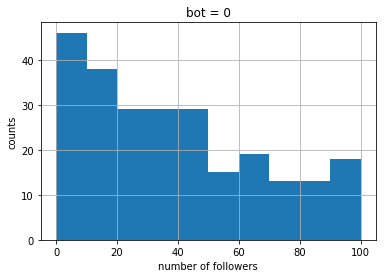

In [111]:
followers_pattern_nonbot = nonbots_data[['followers_count']]
followers_plot = followers_pattern_nonbot['followers_count'].hist(bins=10, range =(0, 100))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

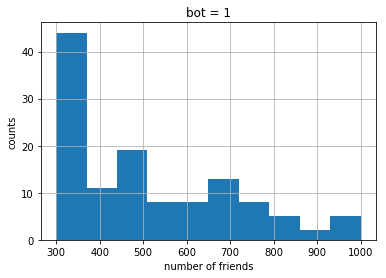

In [112]:
friends_pattern_bots = bots_data[['friends_count']]
friends_plot = friends_pattern_bots['friends_count'].hist(bins=10, range=(300,1000))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of friends')
friends_plot.set_ylabel('counts')
friends_plot

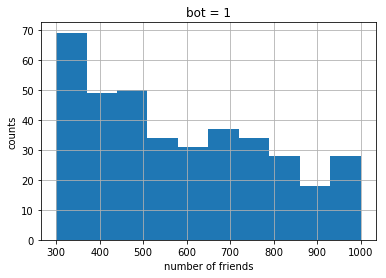

In [113]:
friends_pattern_nonbots = nonbots_data[['friends_count']]
friends_plot = friends_pattern_nonbots['friends_count'].hist(bins=10, range=(300,1000))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of friends')
friends_plot.set_ylabel('counts')
friends_plot

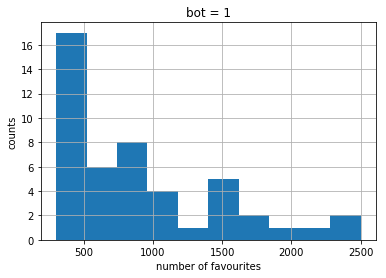

In [114]:
friends_pattern_bots = bots_data[['favourites_count']]
friends_plot = friends_pattern_bots['favourites_count'].hist(bins=10, range=(300,2500))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of favourites')
friends_plot.set_ylabel('counts')
friends_plot

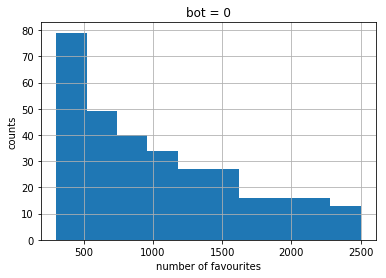

In [115]:
friends_pattern_nonbots = nonbots_data[['favourites_count']]
friends_plot = friends_pattern_nonbots['favourites_count'].hist(bins=10, range=(300,2500))
friends_plot.set_title('bot = 0')
friends_plot.set_xlabel('number of favourites')
friends_plot.set_ylabel('counts')
friends_plot